# Spectral Clustering

### Project members:
Mengshu Shao, Yelena Kernogitski

### GitHub Repositories: 
https://github.com/yelenakernogitski/Spectral-Clustering-Project

### Abstract
Clustering is one of the building blocks in modern data analysis, and has been widely used in machine learning and pattern recognition. Two commonly used approaches are K-means and learning a mixture model using EM. However, these methods have some drawbacks, such as violation of the harsh simplifying assumption which the density of each cluster is Gaussian. One method that provides a possible solution in finding useful clusters is spectral clustering, which utilizes eigenvectors derived from the distance between points. The method performs dimensionality reduction in order to find clusters. In this report, First we implement a simple spectral clustering algorithm for clustering points in . Second we analyze how it works in “ideal” case in which the points are exactly far apart (i.e., when affinity matrix s strictly block diagonal), and in general case in which affinity’s off-diagonal blocks are non-zero. Then we test the algorithm by applying it to a number of challenging clustering problems. Further, we attempt to optimize the algorithm using within-Python options (such as vectorization) in addition to JIT and Cython wrapping functions. Finally, we compare the original method in Python and the latter, higher performance method by determining the efficiency of each method. 


### Algorithm

In [48]:
import numpy as np
import scipy.linalg as la
from numpy.core.umath_tests import inner1d
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
s = np.array([[2,1], [3,4], [5,4]])

#### Form the affinity matrix

In [10]:
n = np.shape(s)[0]
def affinity(s, var):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, i] = 0
            A[i,j] = np.exp(-(la.norm(s[i] - s[j])**2) / (2*var))
    return A

A=affinity(s,1)

array([[  0.00000000e+00,   6.73794700e-03,   1.23409804e-04],
       [  6.73794700e-03,   0.00000000e+00,   1.35335283e-01],
       [  1.23409804e-04,   1.35335283e-01,   1.00000000e+00]])

#### Define D and L

In [11]:
D = np.zeros((n, n))
for i in range(n):
    D[i, i] = 1 / (A[i].sum())
D

array([[ 145.74376886,    0.        ,    0.        ],
       [   0.        ,    7.03862366,    0.        ],
       [   0.        ,    0.        ,    0.88070135]])

In [12]:
L = np.sqrt(D).dot(A).dot(np.sqrt(D))
L

array([[ 0.        ,  0.21580746,  0.00139817],
       [ 0.21580746,  0.        ,  0.33695293],
       [ 0.00139817,  0.33695293,  0.88070135]])

#### Find the k largest eigenvectors of L

In [13]:
value, vector = la.eig(L)

In [14]:
idx = np.argsort(value)[::-1]
value = value[idx]
vector = vector[:, idx]
vector

array([[ 0.07308967,  0.79087251, -0.60760067],
       [ 0.33258841,  0.5550276 ,  0.76244954],
       [ 0.94023553, -0.25780813, -0.22246825]])

In [15]:
k = 2
X = vector[:, 0:k]
X

array([[ 0.07308967,  0.79087251],
       [ 0.33258841,  0.5550276 ],
       [ 0.94023553, -0.25780813]])

#### Form the matrix Y

In [16]:
Y = X / np.sum(X, 1)[:, np.newaxis]
Y

array([[ 0.08459823,  0.91540177],
       [ 0.37469853,  0.62530147],
       [ 1.37778103, -0.37778103]])

#### K-means clustering

In [22]:
def kmeans(y, k, max_iter=10):
    idx = np.random.choice(len(y), k, replace=False)
    idx_data = y[idx]
    for i in range(max_iter):
        dist = np.array([inner1d(y-c, y-c) for c in idx_data])
        clusters = np.argmin(dist, axis=0)
        idx_data = np.array([y[clusters==i].mean(axis=0) for i in range(k)])
    return (clusters, idx_data)

In [27]:
clusters,data=kmeans(Y, 2, max_iter=10)


#### Assign the original point S to clusters

In [29]:
np.concatenate((s, clusters.reshape((3,1))), axis = 1)

array([[2, 1, 0],
       [3, 4, 0],
       [5, 4, 1]])

### Test algorithm on simulated datasets

In [157]:
#num = 50
#s = np.random.multivariate_normal([7,9], [[3, 5],[3, 5]], 25)
#s2 = np.random.multivariate_normal([15,19], [[3, 5],[3, 5]], 25)
#s = np.array([[2,1], [3,4], [5,4]])
#s=np.concatenate((s, s2), axis=0)

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs


batch_size = 50
centers = [[5, 5], [10, 10]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=50, centers=centers, cluster_std=0.7)

s=X


In [158]:
n = np.shape(s)[0]
def affinity(s, var):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, i] = 0
            A[i,j] = np.exp(-(la.norm(s[i] - s[j])**2) / (2*var))
    return A

A=affinity(s,1)
D = np.zeros((n, n))
for i in range(n):
    D[i, i] = 1 / (A[i].sum())

D = np.zeros((n, n))
for i in range(n):
    D[i, i] = 1 / (A[i].sum())

L = np.sqrt(D).dot(A).dot(np.sqrt(D))

value, vector = la.eig(L)

idx = np.argsort(value)[::-1]
value = value[idx]
vector = vector[:, idx]

k = 2
X = vector[:, 0:k]

Y = X / np.sum(X, 1)[:, np.newaxis]

def kmeans(y, k, max_iter=100):
    idx = np.random.choice(len(y), k, replace=False)
    idx_data = y[idx]
    for i in range(max_iter):
        dist = np.array([inner1d(y-c, y-c) for c in idx_data])
        clusters = np.argmin(dist, axis=0)
        idx_data = np.array([y[clusters==i].mean(axis=0) for i in range(k)])
    return (clusters, idx_data)
clusters,data=kmeans(Y, 2, max_iter=10)
clusters=clusters+1
final=np.concatenate((s, clusters.reshape((len(clusters),1))), axis = 1)


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


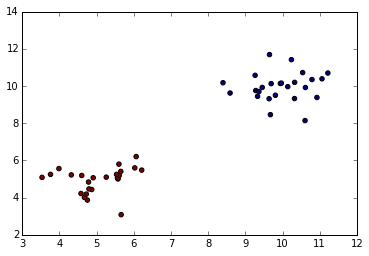

In [159]:
import matplotlib.cm as cm
fig, ax = plt.subplots()
ax.scatter(final[:,0],final[:,1],c=final[:,2])


### Test algorithm on challenging clustering problems

In [171]:
### creating challenging datasets

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler


n_samples = 50
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

datasets = [noisy_circles, noisy_moons, blobs, no_structure]
s,y=datasets[0]



/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


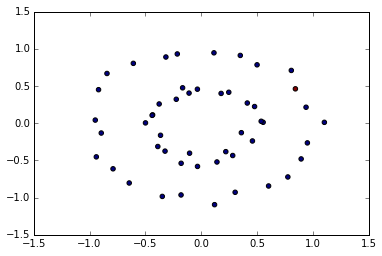

In [172]:
n = np.shape(s)[0]
def affinity(s, var):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, i] = 0
            A[i,j] = np.exp(-(la.norm(s[i] - s[j])**2) / (2*var))
    return A

A=affinity(s,1)
D = np.zeros((n, n))
for i in range(n):
    D[i, i] = 1 / (A[i].sum())

D = np.zeros((n, n))
for i in range(n):
    D[i, i] = 1 / (A[i].sum())

L = np.sqrt(D).dot(A).dot(np.sqrt(D))

value, vector = la.eig(L)

idx = np.argsort(value)[::-1]
value = value[idx]
vector = vector[:, idx]

k = 2
X = vector[:, 0:k]

Y = X / np.sum(X, 1)[:, np.newaxis]

def kmeans(y, k, max_iter=100):
    idx = np.random.choice(len(y), k, replace=False)
    idx_data = y[idx]
    for i in range(max_iter):
        dist = np.array([inner1d(y-c, y-c) for c in idx_data])
        clusters = np.argmin(dist, axis=0)
        idx_data = np.array([y[clusters==i].mean(axis=0) for i in range(k)])
    return (clusters, idx_data)
clusters,data=kmeans(Y, 2, max_iter=10)
clusters=clusters+1
final=np.concatenate((s, clusters.reshape((len(clusters),1))), axis = 1)

import matplotlib.cm as cm
fig, ax = plt.subplots()
ax.scatter(final[:,0],final[:,1],c=final[:,2])


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


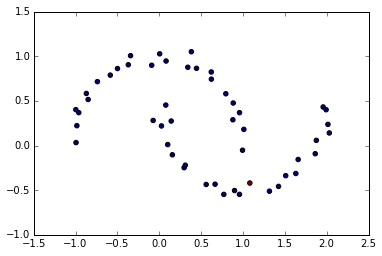

In [173]:
s,y=datasets[1]
n = np.shape(s)[0]
def affinity(s, var):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, i] = 0
            A[i,j] = np.exp(-(la.norm(s[i] - s[j])**2) / (2*var))
    return A

A=affinity(s,1)
D = np.zeros((n, n))
for i in range(n):
    D[i, i] = 1 / (A[i].sum())

D = np.zeros((n, n))
for i in range(n):
    D[i, i] = 1 / (A[i].sum())

L = np.sqrt(D).dot(A).dot(np.sqrt(D))

value, vector = la.eig(L)

idx = np.argsort(value)[::-1]
value = value[idx]
vector = vector[:, idx]

k = 2
X = vector[:, 0:k]

Y = X / np.sum(X, 1)[:, np.newaxis]

def kmeans(y, k, max_iter=100):
    idx = np.random.choice(len(y), k, replace=False)
    idx_data = y[idx]
    for i in range(max_iter):
        dist = np.array([inner1d(y-c, y-c) for c in idx_data])
        clusters = np.argmin(dist, axis=0)
        idx_data = np.array([y[clusters==i].mean(axis=0) for i in range(k)])
    return (clusters, idx_data)
clusters,data=kmeans(Y, 2, max_iter=10)
clusters=clusters+1
final=np.concatenate((s, clusters.reshape((len(clusters),1))), axis = 1)

import matplotlib.cm as cm
fig, ax = plt.subplots()
ax.scatter(final[:,0],final[:,1],c=final[:,2])

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


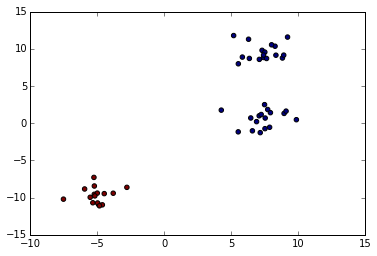

In [169]:
s,y=datasets[2]
n = np.shape(s)[0]
def affinity(s, var):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, i] = 0
            A[i,j] = np.exp(-(la.norm(s[i] - s[j])**2) / (2*var))
    return A

A=affinity(s,1)
D = np.zeros((n, n))
for i in range(n):
    D[i, i] = 1 / (A[i].sum())

D = np.zeros((n, n))
for i in range(n):
    D[i, i] = 1 / (A[i].sum())

L = np.sqrt(D).dot(A).dot(np.sqrt(D))

value, vector = la.eig(L)

idx = np.argsort(value)[::-1]
value = value[idx]
vector = vector[:, idx]

k = 2
X = vector[:, 0:k]

Y = X / np.sum(X, 1)[:, np.newaxis]

def kmeans(y, k, max_iter=100):
    idx = np.random.choice(len(y), k, replace=False)
    idx_data = y[idx]
    for i in range(max_iter):
        dist = np.array([inner1d(y-c, y-c) for c in idx_data])
        clusters = np.argmin(dist, axis=0)
        idx_data = np.array([y[clusters==i].mean(axis=0) for i in range(k)])
    return (clusters, idx_data)
clusters,data=kmeans(Y, 2, max_iter=10)
clusters=clusters+1
final=np.concatenate((s, clusters.reshape((len(clusters),1))), axis = 1)

import matplotlib.cm as cm
fig, ax = plt.subplots()
ax.scatter(final[:,0],final[:,1],c=final[:,2])

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


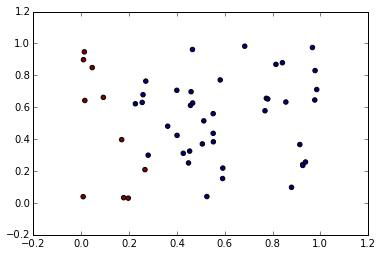

In [170]:
s,y=datasets[3]
n = np.shape(s)[0]
def affinity(s, var):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, i] = 0
            A[i,j] = np.exp(-(la.norm(s[i] - s[j])**2) / (2*var))
    return A

A=affinity(s,1)
D = np.zeros((n, n))
for i in range(n):
    D[i, i] = 1 / (A[i].sum())

D = np.zeros((n, n))
for i in range(n):
    D[i, i] = 1 / (A[i].sum())

L = np.sqrt(D).dot(A).dot(np.sqrt(D))

value, vector = la.eig(L)

idx = np.argsort(value)[::-1]
value = value[idx]
vector = vector[:, idx]

k = 2
X = vector[:, 0:k]

Y = X / np.sum(X, 1)[:, np.newaxis]

def kmeans(y, k, max_iter=100):
    idx = np.random.choice(len(y), k, replace=False)
    idx_data = y[idx]
    for i in range(max_iter):
        dist = np.array([inner1d(y-c, y-c) for c in idx_data])
        clusters = np.argmin(dist, axis=0)
        idx_data = np.array([y[clusters==i].mean(axis=0) for i in range(k)])
    return (clusters, idx_data)
clusters,data=kmeans(Y, 2, max_iter=10)
clusters=clusters+1
final=np.concatenate((s, clusters.reshape((len(clusters),1))), axis = 1)

import matplotlib.cm as cm
fig, ax = plt.subplots()
ax.scatter(final[:,0],final[:,1],c=final[:,2])